In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from matplotlib.colors import ListedColormap

# 1) Charger le dataset HeartDiseaseUCI et l'afficher. Attention à la première colonne

In [29]:
heart_disease_master =pd.read_csv("heart.csv")
heart_disease =heart_disease_master.copy()
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

# 2) Afficher la shape et la description du dataset

In [30]:
heart_disease.shape

(1025, 14)

In [5]:
heart_disease.describe(include=np.number)

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

# 3) Supprimer les valeurs à Nan et vérifier la shape

In [6]:
heart_disease.dropna(inplace=True)
heart_disease.shape

(1025, 14)

# 4) Afficher le nombre de classe de ce dataset

In [7]:
classes=len(heart_disease.target.unique())

print(f"we have {classes} target classes")

we have 2 target classes


# 5) Afficher la matrice de scatter plot et la matrice de corrélation

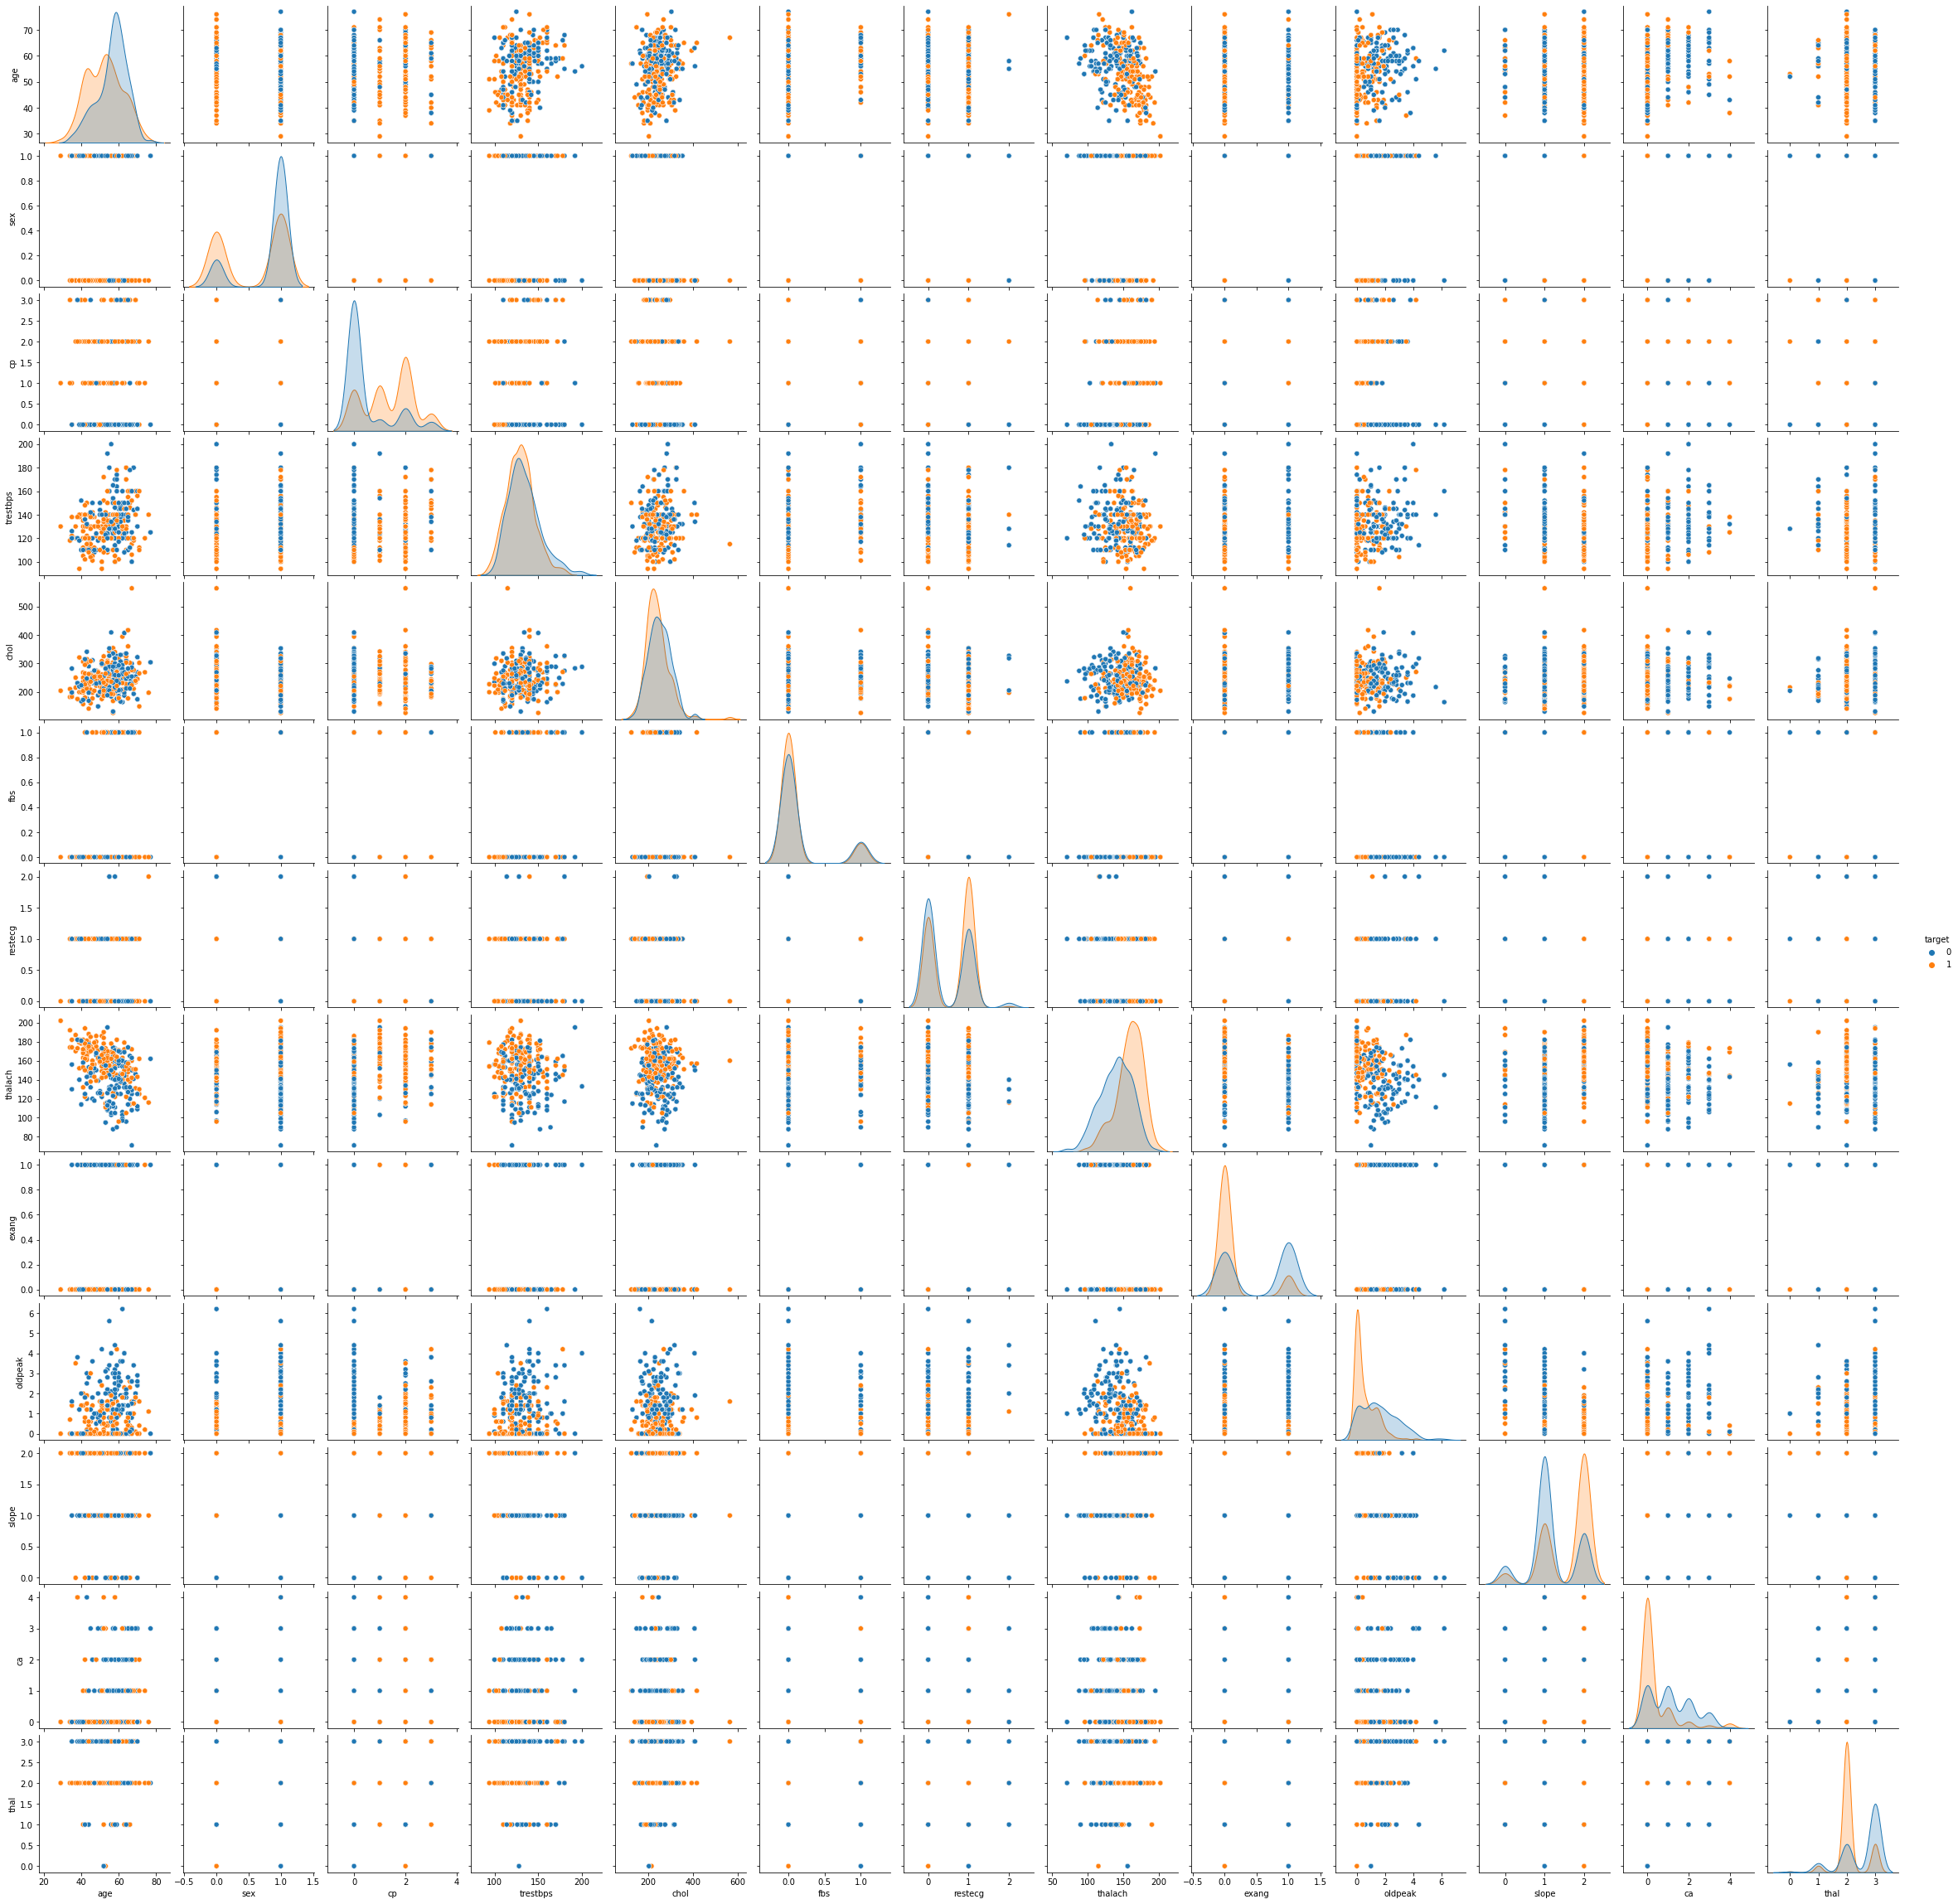

In [8]:
import seaborn as sns
sns.pairplot(heart_disease,hue="target")

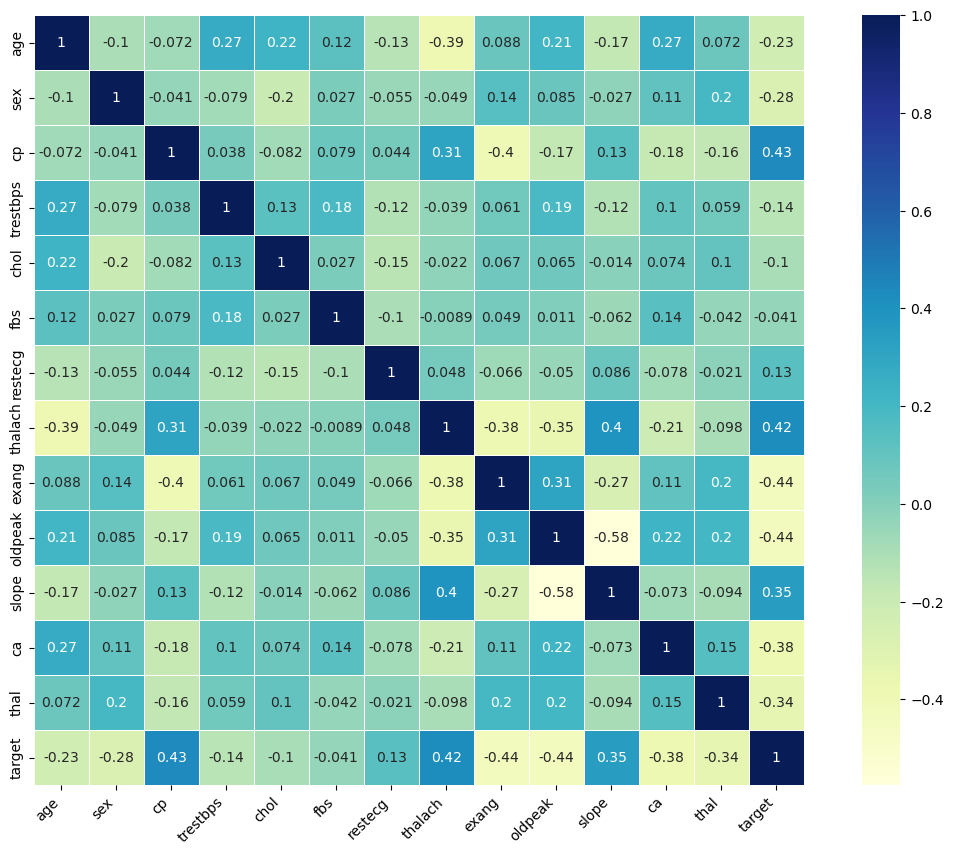

In [9]:
fig, ax = plt.subplots(figsize=(15,10))     # Sample figsize in inches
corr = heart_disease.corr()
ax = sns.heatmap(
    corr, 
    cmap="YlGnBu",
    square=True,
    annot=True,
    linewidths=.5,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 6) Créer les variables X et y. A l'aide d'un MinMaxScaler de Sklearn, ramener les valeurs entre 0 et 1 de X. Afficher la moyenne et la variance de X.

In [10]:
from sklearn.preprocessing import MinMaxScaler

X = heart_disease.loc[:, heart_disease.columns != 'target']
y = heart_disease.target

scalar = MinMaxScaler()
scalar.fit(X)
X= scalar.transform(X)

In [11]:
X.mean(),X.var()

(0.41108732950007737, 0.12855422547117334)

# 7) Découper le dataset en train et en test, entrainer un Perceptron de SKlearn, afficher le classification_report

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron


#First Split L between Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size= 0.8,
                                                    random_state = 42)

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train= scalar.transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=1000,
               tol=0.001)
p.fit(X_train, y_train)


Perceptron(random_state=42)

In [13]:
from sklearn.metrics import classification_report
y_pred= p.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60       102
           1       0.64      0.97      0.77       103

    accuracy                           0.71       205
   macro avg       0.79      0.71      0.68       205
weighted avg       0.79      0.71      0.69       205



# 8) Afficher le type des variables du dataset. Transformer les variables pertinentes en variables caterogielles

In [14]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None

X = heart_disease.loc[:, heart_disease.columns != 'target']
y = heart_disease.target


X['age'] =pd.cut(x=X['age'],bins=[10,18,35,64,90],labels=[0,1,2,3])
X['age'].dtypes 
X['age'] = X['age'].astype(int)
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

# 9) Transformer les variables qualitatives en variables quantitatives

In [16]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(X[['thal']]).toarray(),columns=encoder.get_feature_names_out(['thal']))

#merge one-hot encoded columns back with original DataFrame
X = X.join(encoder_df)
X= X.drop(columns=['thal'])
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0       2    1   0       125   212    0        1      168      0      1.0   
1       2    1   0       140   203    1        0      155      1      3.1   
2       3    1   0       145   174    0        1      125      1      2.6   
3       2    1   0       148   203    0        1      161      0      0.0   
4       2    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020    2    1   1       140   221    0        1      164      1      0.0   
1021    2    1   0       125   258    0        0      141      1      2.8   
1022    2    1   0       110   275    0        0      118      1      1.0   
1023    2    0   0       110   254    0        0      159      0      0.0   
1024    2    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal_0  thal_1  thal_2  thal_3  
0         2   2     0.0     0.0     0.0     1.0  
1         0   0     0.0     0.0     0.0     1.0  
2         0   0     0.0     0.0     0.0     1.0  
3         2   1     0.0     0.0     0.0     1.0  
4         1   3     0.0     0.0     1.0     0.0  
...     ...  ..     ...     ...     ...     ...  
1020      2   0     0.0     0.0     1.0     0.0  
1021      1   1     0.0     0.0     0.0     1.0  
1022      1   1     0.0     0.0     1.0     0.0  
1023      2   0     0.0     0.0     1.0     0.0  
1024      1   1     0.0     0.0     0.0     1.0  

[1025 rows x 16 columns]

# 10) Définir de nouveau X et y à partir de ce nouveau dataframe, refaire un MinMaxScaler, découper en train et test, entrainer un Perceptron, quelle est la différence de résultat ?

In [17]:
scalar = MinMaxScaler()
scalar.fit(X)
X= scalar.transform(X)

#First Split L between Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size= 0.8,
                                                    random_state = 42)

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train= scalar.transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=1000,
               tol=0.001)
p.fit(X_train, y_train)

Perceptron(random_state=42)

In [18]:
from sklearn.metrics import classification_report
y_pred= p.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       102
           1       0.70      0.93      0.80       103

    accuracy                           0.77       205
   macro avg       0.80      0.77      0.76       205
weighted avg       0.80      0.77      0.76       205



# 11) Refaire la même que 9) en mettant le même nombre d'exemples par classe (cf resample de SKlearn)

In [19]:
heart_disease.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [20]:
from sklearn.utils import resample

target_majority = heart_disease[heart_disease.target==0]
target_minority = heart_disease[heart_disease.target==1]
 
# Upsample minority class
minority_upsampled = resample(target_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=526,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
heart_disease_upsampled = pd.concat([target_minority, minority_upsampled])
 
# Display new class counts
heart_disease_upsampled.target.value_counts()

1    526
0    526
Name: target, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
pd.options.mode.chained_assignment = None

X = heart_disease_upsampled.loc[:, heart_disease.columns != 'target']
y = heart_disease_upsampled.target


X['age'] =pd.cut(x=X['age'],bins=[10,18,35,64,90],labels=[0,1,2,3])
X['age'].dtypes 
X['age'] = X['age'].astype(int)

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(X[['thal']]).toarray(),columns=encoder.get_feature_names_out(['thal']))

#merge one-hot encoded columns back with original DataFrame
X = X.join(encoder_df)
X= X.drop(columns=['thal'])

In [22]:
#First Split L between Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size= 0.8,
                                                    random_state = 42)

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train= scalar.transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=1000,
               tol=0.001)
p.fit(X_train, y_train)

Perceptron(random_state=42)

In [23]:
from sklearn.metrics import classification_report
y_pred= p.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71       102
           1       0.72      0.83      0.77       109

    accuracy                           0.74       211
   macro avg       0.75      0.74      0.74       211
weighted avg       0.75      0.74      0.74       211



# Bonus) Refaire les questions 7 à 11 avec un Multi-Layer Perceptron

In [27]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,batch_size=12, epochs=8,
          validation_data=(X_test, y_test))

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

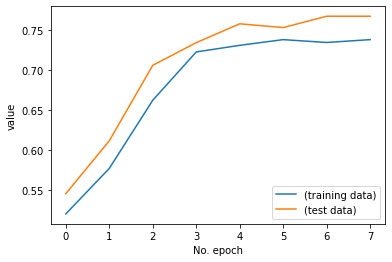

In [ ]:
plt.plot(hist.history['accuracy'], label='(training data)')
plt.plot(hist.history['val_accuracy'], label='(test data)')

plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Ex2

# 12) Importer le dataset winequality, attention au header. Afficher le dataset, la shape, les informations statistiques et enelver les données à Nan. Afficher les corrélations

In [ ]:
wine_master =pd.read_csv("WineQT.csv")
wine =wine_master.copy()
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
wine.shape

(1143, 13)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
wine.loc[:, wine.columns != 'Id'].describe(include=np.number)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
wine.dropna(inplace=True)
wine.shape

(1143, 13)

In [ ]:
classes=len(wine.quality.unique())

print(f"we have {classes} target (s) classes")

we have 6 target (s) classes


In [ ]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

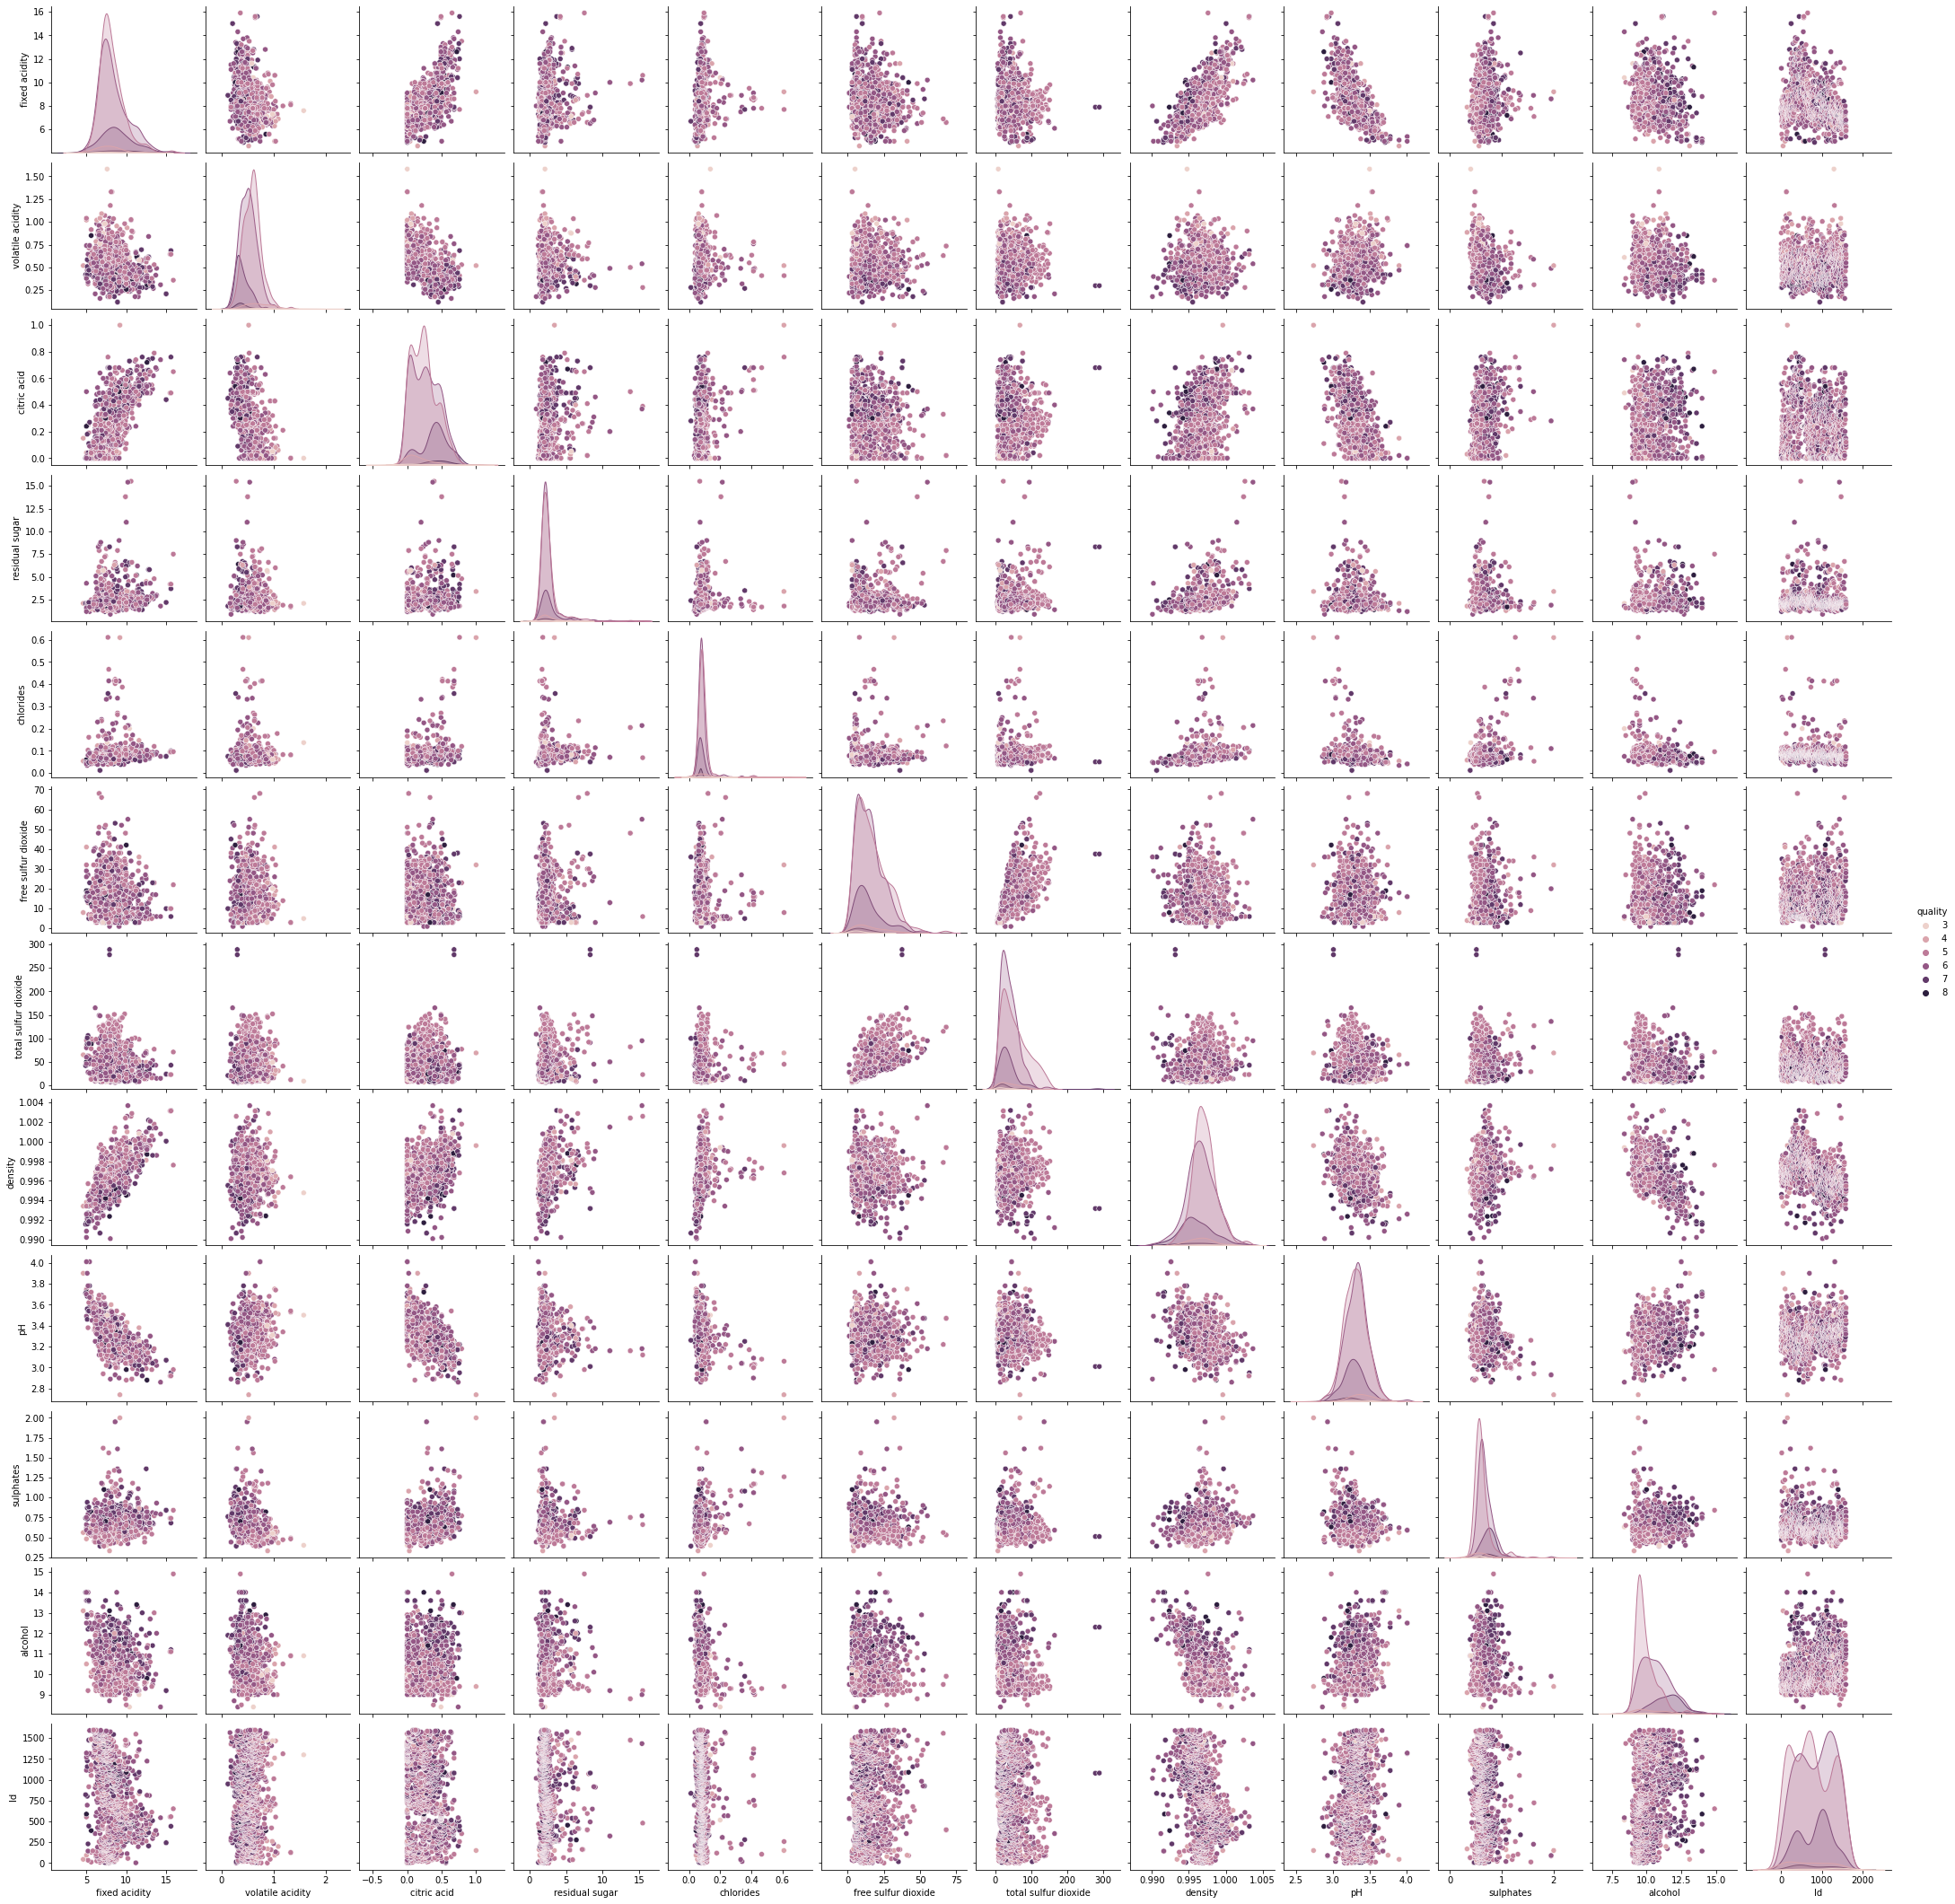

In [ ]:
import seaborn as sns
sns.pairplot(wine,hue="quality")


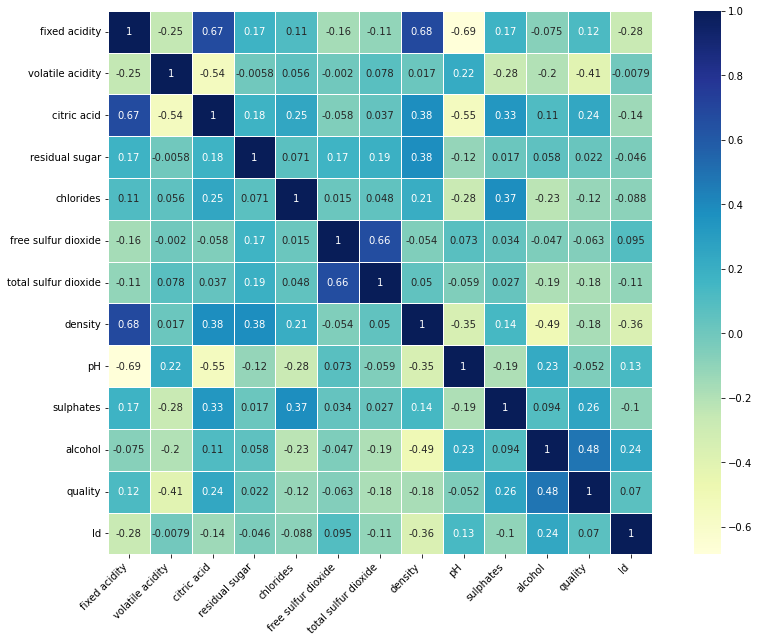

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))     # Sample figsize in inches
corr = wine.corr()
ax = sns.heatmap(
    corr, 
    cmap="YlGnBu",
    square=True,
    annot=True,
    linewidths=.5,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 13) Effectuer une ACP sur toutes les variables, avec la règle du coude déterminé le bon nombre de composantes et refaire une ACP. Afficher le résultat

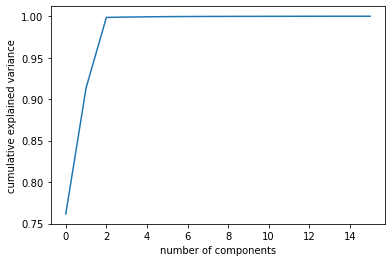

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(n_components=2)
X_new =pca.fit_transform(X)
print(pca.components_)

[[ 1.11984099e-03 -1.81487132e-03 -1.68588284e-03  6.43775886e-02
   9.97854556e-01 -4.69952561e-06 -1.58622976e-03 -1.09474713e-02
   7.20454330e-04  2.70227845e-03 -3.97537798e-04  2.01674165e-03
   2.62721916e-05 -3.39242565e-05 -6.22240752e-05  6.98761401e-05]
 [ 3.94549335e-03  1.16440460e-03 -1.34471169e-02  5.92258077e-02
  -1.48645151e-02 -5.97037503e-05 -9.39991260e-04 -9.97787196e-01
   8.23784481e-03  1.55328129e-02 -9.99876178e-03  9.08818950e-03
   2.66055205e-04  2.59722337e-04  5.88348808e-04 -1.11412635e-03]]


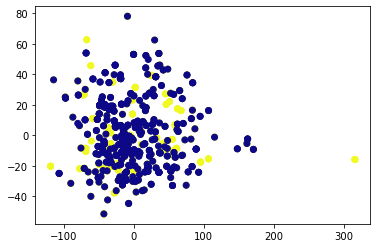

In [ ]:
plt.scatter(X_new[:,0], X_new[:,1], c=y,cmap="plasma")

# 14) Afficher un TSNE à 2 dimensions, que constatez-vous ?

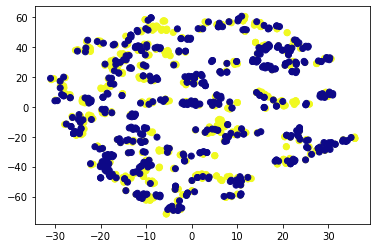

In [ ]:
from sklearn.manifold import TSNE

X_new = TSNE(n_components=2, learning_rate='auto',
               init='random').fit_transform(X)

plt.scatter(X_new[:,0], X_new[:,1], c=y,cmap="plasma")

In [ ]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [ ]:
wine.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

# Classification

# 15) Préparer les données X et y, découper en train et test.
# 16) Définir et entrainer un MLP (réseau de neurones).
# 17) Afficher la loss et l'accuracy sur le train et l'ensemble de validation

In [ ]:
X = wine[wine.columns.difference(['fixed acidity','Id','quality'])]
y = wine.quality

#First Split L between Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size= 0.8,
                                                    random_state = 42)

scalar = MinMaxScaler()
scalar.fit(X_train)
X_train= scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(20, activation='selu'),
    Dense(10, activation='relu'),
    Dense(6, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,batch_size=18,epochs=8,
          validation_data=(X_test, y_test))



RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

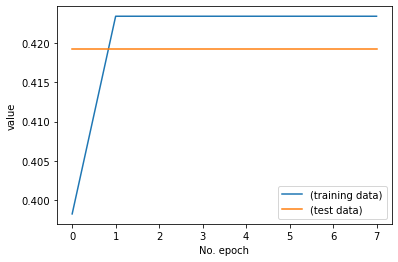

In [ ]:
plt.plot(hist.history['accuracy'], label='(training data)')
plt.plot(hist.history['val_accuracy'], label='(test data)')

plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

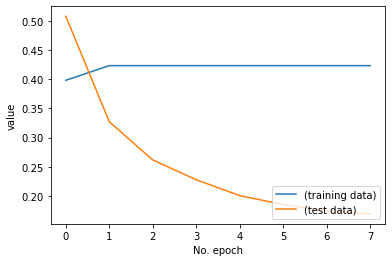

In [ ]:
plt.plot(hist.history['accuracy'], label='(training data)')
plt.plot(hist.history['loss'], label='(test data)')

plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

# Regression

In [ ]:
!pip install tensorflow_addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
result = tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))
result

# 18)-20) Même question que précédemment avec un problème de régression. Utiliser la fonction result comme métrique

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(20, activation='selu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear'),
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=result)

hist = model.fit(X_train, y_train,batch_size=18,epochs=8,
          validation_data=(X_test, y_test))


Epoch 1/8
 8/51 [===>..........................] - ETA: 0s - loss: 36.9652 - r_square: -49.3356 

2022-05-16 13:28:47.107165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 1s 9ms/step - loss: 32.3617 - r_square: -47.1637 - val_loss: 26.8923 - val_r_square: -47.3261
Epoch 2/8
14/51 [=======>......................] - ETA: 0s - loss: 25.8296 - r_square: -38.0803

2022-05-16 13:28:47.597748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 0s 8ms/step - loss: 19.2125 - r_square: -27.5938 - val_loss: 10.3153 - val_r_square: -17.5369
Epoch 3/8
51/51 [==============================] - 0s 7ms/step - loss: 4.8438 - r_square: -6.2090 - val_loss: 1.0121 - val_r_square: -0.8188
Epoch 4/8
51/51 [==============================] - 0s 7ms/step - loss: 0.9106 - r_square: -0.3552 - val_loss: 0.6479 - val_r_square: -0.1642
Epoch 5/8
51/51 [==============================] - 0s 7ms/step - loss: 0.8216 - r_square: -0.2228 - val_loss: 0.6131 - val_r_square: -0.1017
Epoch 6/8
51/51 [==============================] - 0s 7ms/step - loss: 0.7913 - r_square: -0.1777 - val_loss: 0.5893 - val_r_square: -0.0590
Epoch 7/8
51/51 [==============================] - 0s 7ms/step - loss: 0.7643 - r_square: -0.1375 - val_loss: 0.5622 - val_r_square: -0.0103
Epoch 8/8
51/51 [==============================] - 0s 7ms/step - loss: 0.7368 - r_square: -0.0966 - val_loss: 0.5465 - val_r_square: 0.0178


In [ ]:
print(list(zip(y_test,pred))[:5])

NameError: name 'pred' is not defined

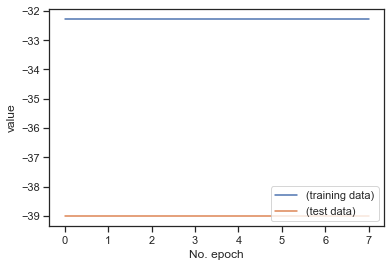

In [ ]:
plt.plot(hist.history['r_square'], label='(training data)')
plt.plot(hist.history['val_r_square'], label='(test data)')

plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

# Bonus) Compétition entre étudiants, chercher la meilleure architecture pour la régression et la classification sans trop overfitter ... ! Que le meilleur gagne !